# D2-M

# 1. Model Prediction Improvement

## 1.1 Introduction

There are several methods that can help improve the prediction performance of models. Here are some commonly used techniques:
   
1. **Data Augmentation**: This refers to techniques that increase the amount of data by adding slightly modified copies of already existing data. For example, in image processing, these techniques could include rotation, scaling, flipping, etc. In text data, it can include methods like back translation or synonym replacement.


2. **Data Cleaning**: This involves taking care of missing values (by either filling them in based on existing data, or removing the data points entirely), and handling outliers (which might distort the training of the model).


3. **Feature engineering**: This is the process of creating new features from existing data that can help improve model performance. This can involve transformations of existing features, creating interaction features, or any other kind of data manipulation that creates new, useful input for the model.


4. **Model Selection**: This involves choosing the right machine learning algorithm for your specific problem. This could be a linear regression model, a decision tree, a neural network, etc. The choice depends on the nature of your data and the problem you're trying to solve.


5. **Hyperparameter tuning**: Hyperparameters are parameters that are not learned from the data but are set before the training process. Examples are learning rate, number of layers in a neural network, number of clusters in a K-means clustering, etc. Tuning these can often significantly improve performance. Techniques for hyperparameter tuning include grid search, random search, and more advanced methods like Bayesian optimization.


6. **Cross-validation**: This is a resampling procedure used to evaluate the performance of a model on a limited data sample. The dataset is partitioned into 'k' equally sized folds, and the model is trained on 'k-1' folds, and the remaining fold is used for testing. This process is repeated 'k' times so that we obtain a model performance score for each fold. It helps in assessing how the results of a statistical analysis will generalize to an independent data set.


7. **Regularization**: This is a technique used to prevent overfitting, which is when a model performs well on the training data but poorly on unseen data. Regularization works by adding a penalty term to the loss function that increases as the complexity of the model increases.


8. **Ensemble your model**: This refers to combining different models to improve overall performance. Techniques include Bagging (e.g., Random Forest), Boosting (e.g., Gradient Boosting, XGBoost), and Stacking.


Since we have already covered data cleaning, feature engineering in the previous sections, our attention in this section will shift to other topics, including data augmentation, model selection, ensemble model, regularization, cross-validation and hyperparameter tuning.

## 1.2 Dataset Exploration

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [23]:
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()

# Create a dataframe
# "digits.data" contains the features and "digits.target" contains the target
df = pd.DataFrame(data= np.c_[digits['data'], digits['target']],
                  columns= digits['feature_names'] + ['target'])

# Separate the features (X) and the target (y)
X = df[digits['feature_names']]
y = df['target']

# Display the dataframe
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

## 1.3 Data Augmentation

The `augment_data` function is defined to perform data augmentation. It takes the original images and labels as input and generates augmented versions of each image. The augmentation includes adding the original image, its horizontal flip, and a 90-degree rotation. The augmented images and labels are stored in `augmented_images` and `augmented_labels`, respectively.

In [25]:
# Load the digit dataset
digits = load_digits()
images = digits.images
labels = digits.target

# Data augmentation (optional)
def augment_data(images, labels):
    augmented_images = []
    augmented_labels = []
    for image, label in zip(images, labels):
        augmented_images.append(image)
        augmented_labels.append(label)

        augmented_images.append(np.fliplr(image))
        augmented_labels.append(label)

        augmented_images.append(np.rot90(image, k=1))
        augmented_labels.append(label)

    return np.array(augmented_images), np.array(augmented_labels)

augmented_images, augmented_labels = augment_data(images, labels)


This code combines the original images and their augmented versions into a single dataset, resulting in `all_images` and `all_labels`.

In [26]:
# Combine original and augmented data
all_images = np.concatenate([images, augmented_images])
all_labels = np.concatenate([labels, augmented_labels])

The `plot_images` function is defined to visualize the original images and their augmented counterparts. It uses Matplotlib to create a grid of images, with the number of rows and columns specified by `rows` and `cols`. The function displays `num_samples` samples of original and augmented images side by side for better understanding.

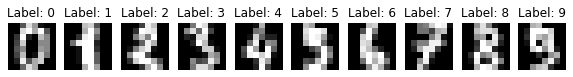

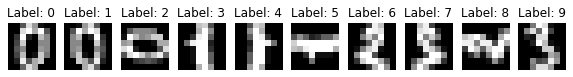

In [27]:
# Visualize the original images and their augmented counterparts
def plot_images(images, labels, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')
    plt.show()

num_samples = 10# Number of samples to visualize for each category
original_images_sample = images[:num_samples]
augmented_images_sample = augmented_images[:num_samples]

plot_images(original_images_sample, labels[:num_samples], 1, num_samples)
plot_images(augmented_images_sample, labels[:num_samples], 1, num_samples)

## 1.4 Data Pre-processing

The digits dataset from sklearn is a clean dataset, meaning it `doesn't have missing values`, it `doesn't contain categorical features` that need to be encoded, and it `doesn't have obvious outliers`. Therefore, some pre-processing steps like handling missing values, encoding categorical variables, or outlier treatment are not applicable in this case.

## 1.5 Feature Engineering

The digits dataset is a set of 8x8 pixel images, and each pixel in the image is a feature. There are a total of 64 features for each image. These features are already in a form that's suitable for machine learning models, so it's typically not necessary to do additional feature engineering.

## 1.6 Hyperparameter Tuning using GridSearchCV with Visualization

### 1.6.1 Split the data into training and test sets

In [28]:
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

## 1.6.2 Hyperparameter Tuning using GridSearchCV with Visualization

This section performs model selection and hyperparameter tuning using GridSearchCV. We define `param_grid`, a dictionary with hyperparameters and their possible values. The `GridSearchCV` will perform a grid search over the parameter grid and use 5-fold cross-validation (`cv=5`) to find the best combination of hyperparameters for the Random Forest Classifier. After fitting the grid search, the best model is stored in `grid_search.best_estimator_`.

In [29]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}

rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train.reshape(len(X_train), -1), y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]})

## 1.6.3 Visualize Hyperparameter Tuning Results

This part is new and focuses on the visualization of hyperparameter tuning results. We extract the mean cross-validation scores (`mean_scores`) and the corresponding hyperparameter combinations (`param_combinations`) from the `grid_search.cv_results_ dictionary`. The `for` loop then prints each mean CV score along with its corresponding hyperparameter combination for reference.

After printing, we create a scatter plot to visualize the mean CV scores with respect to the hyperparameter combinations. The x-axis represents the values of `n_estimators`, the y-axis represents the values of `max_depth`, and the color of each point corresponds to the mean CV score. This plot helps us understand how different hyperparameter settings affect the model's performance during hyperparameter tuning.

Mean CV Score: 0.9765, Hyperparameters: {'max_depth': None, 'n_estimators': 50}
Mean CV Score: 0.9797, Hyperparameters: {'max_depth': None, 'n_estimators': 100}
Mean CV Score: 0.9821, Hyperparameters: {'max_depth': None, 'n_estimators': 200}
Mean CV Score: 0.9741, Hyperparameters: {'max_depth': 10, 'n_estimators': 50}
Mean CV Score: 0.9746, Hyperparameters: {'max_depth': 10, 'n_estimators': 100}
Mean CV Score: 0.9767, Hyperparameters: {'max_depth': 10, 'n_estimators': 200}
Mean CV Score: 0.9774, Hyperparameters: {'max_depth': 20, 'n_estimators': 50}
Mean CV Score: 0.9805, Hyperparameters: {'max_depth': 20, 'n_estimators': 100}
Mean CV Score: 0.9805, Hyperparameters: {'max_depth': 20, 'n_estimators': 200}


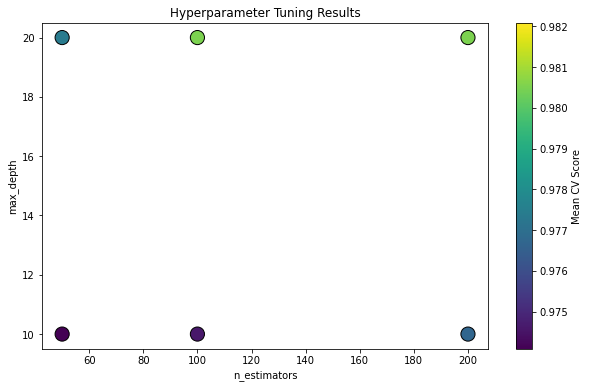

In [30]:
# Visualize Hyperparameter Tuning Results
mean_scores = grid_search.cv_results_['mean_test_score']
param_combinations = list(grid_search.cv_results_['params'])

for mean_score, params in zip(mean_scores, param_combinations):
    print(f"Mean CV Score: {mean_score:.4f}, Hyperparameters: {params}")

# Plotting the Mean Cross-Validation Scores
n_estimators_values = [param['n_estimators'] for param in param_combinations]
max_depth_values = [param['max_depth'] for param in param_combinations]

plt.figure(figsize=(10, 6))
plt.scatter(n_estimators_values, max_depth_values, c=mean_scores, cmap='viridis', s=200, edgecolors='k')
plt.colorbar(label='Mean CV Score')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('Hyperparameter Tuning Results')
plt.show()

### 1.6.4 Best Model from Hyperparameter Tuning

In [31]:
# Best Model from Hyperparameter Tuning
best_model = grid_search.best_estimator_
best_model

RandomForestClassifier(n_estimators=200)

## 1.7 Regularization

We select the best model found during hyperparameter tuning and store it in `best_model`. Additionally, we create a regularized Random Forest Classifier (`regularized_model`) with a specific `max_depth` hyperparameter to prevent overfitting.

In [32]:
regularized_model = RandomForestClassifier(max_depth=10)
regularized_model.fit(X_train.reshape(len(X_train), -1), y_train)

RandomForestClassifier(max_depth=10)

## 1.8 Ensemble Techniques (Bagging and Voting)

In this section, we define two ensemble models: the Bagging Classifier (`bagging_model`) using regularized_model as the base estimator, and the Voting Classifier (`voting_model`) that combines the `regularized_model` and the `bagging_model`.

In [33]:
# Ensemble Techniques (Bagging and Voting)
bagging_model = BaggingClassifier(base_estimator=regularized_model, n_estimators=10, random_state=42)
voting_model = VotingClassifier([('rf', regularized_model), ('bagging', bagging_model)])


Both the Bagging and Voting models are trained on the entire training data.


## 1.9 Train the Bagging and Voting models on the entire training data

In [34]:
# Train the Bagging and Voting models on the entire training data
bagging_model.fit(X_train.reshape(len(X_train), -1), y_train)
voting_model.fit(X_train.reshape(len(X_train), -1), y_train)


VotingClassifier(estimators=[('rf', RandomForestClassifier(max_depth=10)),
                             ('bagging',
                              BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=10),
                                                random_state=42))])

## 1.10 Evaluate the Bagging and Voting models on the test set

The Bagging and Voting models are evaluated on the test set, and their performance is measured using accuracy scores.

In [35]:
y_pred_bagging = bagging_model.predict(X_test.reshape(len(X_test), -1))
y_pred_voting = voting_model.predict(X_test.reshape(len(X_test), -1))

test_accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
test_accuracy_voting = accuracy_score(y_test, y_pred_voting)

## 1.11 Print results

In [36]:
# Print results
print("Best Model Parameters:", grid_search.best_params_)
print("Test Accuracy (Best Model):", best_model.score(X_test.reshape(len(X_test), -1), y_test))
print("Test Accuracy (Bagging Model):", test_accuracy_bagging)
print("Test Accuracy (Voting Model):", test_accuracy_voting)

Best Model Parameters: {'max_depth': None, 'n_estimators': 200}
Test Accuracy (Best Model): 0.980528511821975
Test Accuracy (Bagging Model): 0.9756606397774688
Test Accuracy (Voting Model): 0.9770514603616134


## 1.12 Exercise

Question: You are working on a classification problem using a Support Vector Machine (SVM) classifier. The dataset you are using is quite large and has a high number of features. You want to optimize the hyperparameters of the SVM model to achieve better performance. Write a code snippet in Python using scikit-learn to perform hyperparameter tuning for the SVM classifier using GridSearchCV. Assume the dataset is already split into X_train, X_test, y_train, and y_test, and the SVM classifier is initialized as SVC().

Hint: You can consider tuning hyperparameters like the kernel type, C (regularization parameter), and gamma.

Note: For the purpose of this question, you don't need to worry about standardizing or normalizing the features.

Please write your code below:

In [37]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC()

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'kernel': ,
    'C': ,
    'gamma': 
}

# Create the GridSearchCV object with cross-validation (e.g., 5-fold cross-validation)
grid_search =

# Perform the hyperparameter tuning on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the GridSearchCV
best_params = 
print("Best hyperparameters:", )

# Evaluate the model with the best hyperparameters on the test data
best_svm_classifier = 
y_pred = 
accuracy = 
print("Test accuracy with best hyperparameters:", accuracy)


Best hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Test accuracy with best hyperparameters: 1.0


# 2. Bagging and Boosting

## 2.1 Introduction

### 2.1.1 Overview of Ensemble Learning:

- Ensemble learning is a powerful technique in machine learning where multiple models are combined to create a more robust and accurate predictive model.
- The idea is to leverage the collective intelligence of multiple models to make better predictions than any individual model could achieve alone.
- Ensemble learning draws inspiration from the wisdom of crowds, where diverse opinions lead to better decisions than relying on a single perspective.
- By aggregating the predictions from multiple models, ensemble learning aims to improve generalization and reduce the risk of overfitting.



### 2.1.2 Importance of Ensemble Learning in Data Science:

- Data science often deals with complex and noisy datasets where building a single strong model may be challenging.
- Ensemble learning helps address the limitations of individual models by combining their strengths and compensating for their weaknesses.
- Ensemble methods can significantly boost the accuracy and performance of predictive models, making them invaluable in various real-world applications.
- Ensemble learning is widely used in competitions like Kaggle, where top-performing models often utilize sophisticated ensemble techniques.
- In practical scenarios, ensemble models are more reliable and trustworthy due to their ability to capture diverse patterns and avoid model bias.

### 2.1.3 What to Expect in This Session:

- In this session, we will delve into two essential ensemble learning techniques: bagging and boosting.
- We will understand the underlying principles of each technique, explore their strengths and weaknesses, and discover when to use them.
- We will also demonstrate coding examples using Python and scikit-learn to solidify your understanding and enable you to implement these techniques in your projects.
- By the end of this session, you will have a clear understanding of how bagging and boosting contribute to the success of predictive models and the importance of ensemble learning in data science.

## 2.2 Bagging (Bootstrap Aggregating)

### 2.2.1 Definition and Purpose of Bagging:

- Bagging, short for Bootstrap Aggregating, is an ensemble learning technique that aims to improve the accuracy and robustness of predictive models.
- The primary purpose of bagging is to reduce variance and combat overfitting, which are common challenges in machine learning.
- By combining predictions from multiple base learners, bagging reduces the risk of relying too heavily on any one model's idiosyncrasies.


### 2.2.2 How Bagging Works:

1. Bootstrapping and Creating Subsets:
- Bagging starts by creating multiple subsets of the original training data through bootstrapping.
- Bootstrapping involves randomly sampling data with replacement, resulting in diverse subsets with the same size as the original dataset.


2. Training Multiple Base Learners:
- Each subset is used to train an independent base learner (model), such as decision trees, SVMs, or neural networks.
- These base learners are trained independently, and their predictions are combined later to form the ensemble.


3. Aggregating Predictions:
- Once all base learners are trained, the final prediction is made by aggregating their individual predictions.
- For regression tasks, predictions are averaged, while for classification tasks, majority voting is used to decide the final prediction.


### 2.2.3 Advantages of Bagging:

1. Reducing Variance and Overfitting:
- Bagging's main advantage is its ability to reduce variance and combat overfitting.
- By combining predictions from diverse models, it results in a more balanced and stable ensemble model.


2. Robustness to Noisy Data and Outliers:
- Bagging is robust to noisy data and outliers, as it diminishes the impact of individual data points through aggregation.
- Outliers are less likely to affect the overall prediction due to the averaging or voting process.


### 2.2.4 Common Algorithms Using Bagging:

1. Random Forest:
- Random Forest is one of the most popular bagging algorithms that uses decision trees as base learners.
- It builds a large number of decision trees, and each tree is trained on a bootstrapped subset of the data.
- The final prediction is made by aggregating the predictions of all individual trees.

2. Bagged Decision Trees:
- Bagged Decision Trees, or simply Bagging with decision trees, is a straightforward bagging approach.
- It applies the same concept as Random Forest but with a smaller number of trees (often not enough to be considered a forest).

3. Bagged SVMs (Support Vector Machines):
- Bagging can also be applied to other base learners like Support Vector Machines (SVMs).
- Bagged SVMs utilize subsets of data for training multiple SVM models, and their predictions are aggregated to make the final prediction.

### 2.2.5 Coding Example with Random Forest (Python and scikit-learn):

In [38]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import numpy as np

#### 2.2.5.1 Loading Data

In [39]:
# Load the covertype dataset from OpenML
covertype = fetch_openml('covertype', version=4)
X = covertype.data
y = covertype.target.astype('int') - 1  # Shift labels to range 0-6

This code fetches the **covertype** dataset from OpenML, and then extracts the data and target labels. The labels are shifted from 1-7 to 0-6 for ease of use.

#### 2.2.5.2 Data Subset (for speed)

In [40]:
# Select a subset of data for demonstration purposes (and for faster execution)
X = X[:20000]
y = y[:20000]

Given the large size of the **covertype** dataset, we take a subset of 20,000 samples for faster demonstration.

#### 2.2.5.3 Data Splitting

In [41]:
# Split data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

This splits the data into training and testing sets. 30% of the data is reserved for testing.

#### 2.2.5.4 Results Storage Initialization

In [42]:
# Initialize list to store results of each model
results = []

An empty list to store accuracy results for each model.

#### 2.2.5.5 Simple Decision Tree Training and Prediction

In [44]:
# Train and test a simple decision tree classifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
results.append(['Simple Decision Tree', accuracy_score(y_test, tree_pred)])

This section trains a basic decision tree on the training data, makes predictions on the test data, and stores the accuracy in the results list.

#### 2.2.5.6 Random Forest Training and Prediction

In [45]:
# Train and test a Random Forest with 5 trees
rf_small = RandomForestClassifier(n_estimators=5, random_state=42)
rf_small.fit(X_train, y_train)
rf_small_pred = rf_small.predict(X_test)
results.append(['Random Forest (5 trees)', accuracy_score(y_test, rf_small_pred)])

Trains a Random Forest model with 5 trees (small for demonstration), makes predictions, and adds the accuracy to the results list.

#### 2.2.5.7 Manual Bagging Implementation

In [46]:
# Manual implementation of Bagging
n_learners = 5  # Number of learners (trees) for bagging
predictions = []  # List to store predictions of each learner

# Bootstrapping and training for each learner
for i in range(n_learners):
    boot_X, boot_y = resample(X_train, y_train, replace=True, n_samples=len(X_train))
    tree = DecisionTreeClassifier()
    tree.fit(boot_X, boot_y)
    predictions.append(tree.predict(X_test))

This manually implements bagging by bootstrapping the training data **n_learners** times, training a decision tree on each bootstrap sample, and storing its predictions.

#### 2.2.5.8 Mode Calculation for Bagging Predictions

In [47]:
# Function to compute mode for an array
def compute_mode(array):
    return np.bincount(array).argmax()

# Convert predictions list of arrays to a 2D numpy array
predictions_array = np.array(predictions)

# Calculate mode of predictions for bagging
mode_predictions = []
for column in predictions_array.T:  # Now we transpose the numpy array
    mode_predictions.append(compute_mode(column))
mode_predictions = np.array(mode_predictions)
results.append(['Manual Bagging (Mode)', accuracy_score(y_test, mode_predictions)])

For each sample in the test set, this computes the mode (most common prediction) across the **n_learners** decision trees and stores the results.

#### 2.2.5.9 Median Calculation for Bagging Predictions

In [48]:
# Calculate median of predictions for bagging
median_predictions = np.median(predictions, axis=0).astype(int)
results.append(['Manual Bagging with Median', accuracy_score(y_test, median_predictions)])

This section demonstrates another way to aggregate predictions by using the median. It then stores the results.

#### 2.2.5.10 Convert Results to DataFrame and Display

In [49]:
# Convert the results list to a DataFrame and display it
df_results = pd.DataFrame(results, columns=['Model', 'Accuracy'])

# Sort the DataFrame based on the 'Accuracy' column in descending order
df_results = df_results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
df_results.head()

,Model,Accuracy
0,Manual Bagging (Mode),0.844833
1,Manual Bagging with Median,0.837000
2,Random Forest (5 trees),0.827667
3,Simple Decision Tree,0.812667


This converts the **results** list into a pandas DataFrame and displays it for easy comparison of model accuracies.

### 2.2.6 Exercise

- Question: What is the main principle behind the Bagging technique? How does it help in reducing overfitting?
- Answer:



## 2.3 Bagging (Bootstrap Aggregating)

### 2.3.1 Definition and Purpose of Boosting:

- Boosting is an ensemble learning technique that focuses on creating a strong learner by combining multiple weak learners iteratively.
- The main purpose of boosting is to improve the accuracy and performance of predictive models by giving more emphasis to misclassified instances during training.
- Boosting learns from its mistakes in an adaptive manner, continually refining its predictions to achieve high accuracy on complex datasets.


### 2.3.2 How Boosting Works:

1. Sequential Learning and Weighted Misclassifications:
- Boosting works in a sequential manner, where each base learner is trained based on the performance of the previous ones.
- During training, it assigns higher weights to misclassified instances, making them more influential in subsequent iterations.


2. Iterative Training of Base Learners:
- In each iteration, a new base learner is trained to correct the mistakes made by the ensemble so far.
- The base learners are typically weak models (e.g., shallow decision trees) to avoid overfitting and maintain interpretability.


3. Emphasizing Difficult Instances:
- Boosting focuses on challenging instances that are frequently misclassified by previous base learners.
- By repeatedly emphasizing these difficult instances, boosting ensures that the ensemble model pays more attention to them and gradually improves its performance.



### 2.3.3 Advantages of Boosting:

1. Adaptive Learning and High Accuracy:
- Boosting's adaptive learning approach allows it to learn from misclassifications and significantly improve predictive accuracy.
- It is particularly effective in handling complex relationships in data, making it suitable for various real-world applications.


2. Model Versatility and Feature Importance:
- Boosting can be applied with various base learners, such as decision trees, SVMs, and neural networks.
- Additionally, many boosting algorithms provide feature importance scores, enabling us to identify the most influential features in the model's decision-making process.


### 2.3.4 Common Algorithms Using Boosting:

1. AdaBoost (Adaptive Boosting):
- AdaBoost is one of the earliest and most popular boosting algorithms.
- It assigns higher weights to misclassified instances and combines the predictions of weak learners to create a strong ensemble model.
- AdaBoost is suitable for both classification and regression tasks.


2. Gradient Boosting Machines (GBM):
- GBM builds base learners sequentially, focusing on the gradients of the loss function to optimize the model's performance.
- It uses a process called gradient descent to minimize the errors in each iteration.
- GBM is widely used for regression and classification tasks and is known for its high accuracy and flexibility.


3. XGBoost and LightGBM:
- XGBoost and LightGBM are optimized implementations of gradient boosting that are efficient and scalable.
- They utilize advanced techniques like parallel processing and tree-pruning to achieve better performance.
- These algorithms are popular in data science competitions and real-world applications due to their speed and accuracy.




### 2.3.5 Coding Example with AdaBoost (Python and scikit-learn):

In [50]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import numpy as np

This section imports all the necessary libraries and modules we'll use throughout the demonstration.

#### 2.3.5.1 Load and preprocess data

In [51]:
# Load the covertype dataset from OpenML
covertype = fetch_openml('covertype', version=4)
X = covertype.data
y = covertype.target.astype('int') - 1  # Shift labels to range 0-6

# Select a subset of data for demonstration purposes (and for faster execution)
X = X[:20000]
y = y[:20000]

#### 2.3.5.2 Split data into training and test sets

In [52]:
# Split data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

This line splits our data into training and test sets. 70% of the data is used for training and 30% for testing.

#### 2.3.5.4 Initialize a list to store results

In [53]:
# Initialize list to store results of each model
results = []

We'll store the accuracy results of each model in this list and then convert it to a DataFrame at the end.

#### 2.3.5.5 Train and test a simple decision tree classifier

In [54]:
# Train and test a simple decision tree classifier
tree = DecisionTreeClassifier(max_depth=1)  # Setting depth to 1, as AdaBoost typically uses 'stumps'
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
results.append(['Simple Decision Tree', accuracy_score(y_test, tree_pred)])

We train a simple decision tree "stump" (tree of depth 1) on the training data and then predict and evaluate its accuracy on the test set.

#### 2.3.5.6 Train and test a Random Forest with 5 trees

In [55]:
rf_small = RandomForestClassifier(n_estimators=5, random_state=42)
rf_small.fit(X_train, y_train)
rf_small_pred = rf_small.predict(X_test)
results.append(['Random Forest (5 trees)', accuracy_score(y_test, rf_small_pred)])

Next, we train a random forest ensemble with 5 trees and then predict and evaluate its accuracy on the test set.

#### 2.3.5.7 Train and test AdaBoost with 5 weak learners

In [56]:
#### 3.5.7 Train and test AdaBoost with 5 weak learners
# Train and test AdaBoost with 5 weak learners (stumps)
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), 
                              n_estimators=5, random_state=42)
adaboost.fit(X_train, y_train)
adaboost_pred = adaboost.predict(X_test)
results.append(['AdaBoost (5 learners)', accuracy_score(y_test, adaboost_pred)])

Here, we train an AdaBoost classifier using decision tree stumps as weak learners. We use 5 such stumps. After training, we predict on the test set and evaluate the accuracy.

#### 2.3.5.8 Convert the results list to a sorted DataFrame and display it

In [57]:
# Convert the results list to a DataFrame
df_results = pd.DataFrame(results, columns=['Model', 'Accuracy'])

# Sort the DataFrame based on the 'Accuracy' column in descending order
df_results = df_results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
df_results.head()

,Model,Accuracy
0,Random Forest (5 trees),0.827667
1,AdaBoost (5 learners),0.488667
2,Simple Decision Tree,0.398500


### 2.3.6 Exercise

- Question: Describe how boosting works. How is it different from bagging?
- Answer: Boosting trains learners sequentially where each subsequent learner tries to correct the mistakes of the previous one. Unlike bagging, which aims to reduce variance, boosting aims to reduce bias and variance.

## 2.4 Strengths and Weaknesses

### 2.4.1 Comparison of Bagging and Boosting:

- Bagging and Boosting are both ensemble learning techniques that combine multiple models to improve predictive performance.
- Bagging aims to reduce variance and overfitting by aggregating predictions from diverse models.
- Boosting focuses on adaptive learning and aims to correct mistakes made by previous base learners in an iterative manner.


### 2.4.2 Strengths of Bagging:

1. Reduced Variance and Overfitting:
- Bagging reduces the risk of overfitting by combining predictions from multiple models with diverse training subsets.

2. Robustness to Noisy Data:
- Bagging is robust to noisy data and outliers since it aggregates predictions, minimizing the impact of individual data points.

3. Efficient Parallelization:
- Training base learners in bagging can be easily parallelized, making it efficient and scalable.


### 2.4.3 Weaknesses of Bagging:

1. Lack of Interpretability:
- The ensemble model in bagging may lack interpretability, especially if the base learners are complex models like Random Forest.


2. Bias Preservation:
- Bagging may not address bias in the base learners; if the base models are biased, the ensemble may inherit the bias.


3. Limited Performance Improvement:
- Bagging may not improve performance significantly if the base learners are already strong and diverse.



### 2.4.4 Strengths of Boosting:
1. Adaptive Learning and High Accuracy:
- Boosting adaptively learns from mistakes and focuses on challenging instances, leading to high accuracy.
2. Model Versatility and Feature Importance:
- Boosting can be used with various base learners and often provides feature importance scores for better understanding.



### 2.4.5 Weaknesses of Boosting:
1. Sensitivity to Noisy Data and Outliers:
- Boosting may be sensitive to noisy data and outliers, affecting model performance.
2. Slower Training and Limited Parallelization:
- Training base learners sequentially makes boosting slower than bagging, and it may be less efficient to parallelize.
3. Potential Overfitting:
- Boosting may be prone to overfitting, especially if the number of iterations is too high.


### 2.4.6 Choosing Between Bagging and Boosting: Considerations:
- The choice between bagging and boosting depends on the dataset, the complexity of the problem, and the available computational resources.
- Bagging is suitable when the base models are diverse and the goal is to reduce variance and overfitting.
- Boosting is preferred when high accuracy is crucial, and the dataset is not significantly affected by noisy data and outliers.

## 2.5 Strengths and Weaknesses

1. High Variance Model:
- You've trained a deep decision tree on your dataset and noticed that it performs extremely well on the training data but poorly on the validation data.

- Question: Which ensemble technique might help remedy this, bagging or boosting?

2. High Bias Model:
- Your team trained a shallow decision tree (i.e., a decision stump) on a complex dataset. The model performs poorly on both training and validation sets.

- Question: Which ensemble technique might help improve this model's performance, bagging or boosting?

3. Large Dataset:
- You have a very large dataset and are concerned about the training time. You're considering an ensemble technique to improve your model's performance.

- Question: Which technique, bagging or boosting, would typically be faster in training?

4. Noisy Data:
- Your dataset contains a significant amount of noise, and outliers are causing models to underperform.

- Question: Which ensemble method, bagging or boosting, might be more robust to such noise and why?

5. Model Diversity:
- You're working on an ensemble model, and you have access to various diverse base models. You believe the errors in these models are largely uncorrelated.

- Question: Which ensemble technique might benefit more from this diversity, bagging or boosting?

6. Information on Error Types:
- After evaluating a model, you've noticed that it's making many types of errors, but the frequency of each type is low.

- Question: If you had to choose an ensemble technique to correct diverse error types, would you pick bagging or boosting?

7. Final Model Interpretability:
- You're working on a healthcare project where the interpretability of the model is crucial. Doctors want to understand how the model makes decisions.

- Question: Which ensemble technique, bagging or boosting, might be more challenging in terms of interpretability, and why?


# 3. Supply chain example

## 3.1 Introduction to the Dataset

The dataset at hand is a comprehensive sales record dataset provided by a a renowned consumer goods company. In here, we can it "company A". This dataset aims to facilitate the prediction of item sales quantities in each unit (EA) using various informative features. The dataset encompasses a wide range of variables that provide insights into the sales dynamics and factors influencing consumer behavior.


### Objective:

The primary objective of this dataset is to develop a predictive model that accurately estimates the sales quantity of each item (Pos_Qty_EA) based on the provided features. By leveraging the historical sales data, "company A" aims to forecast item sales more effectively, optimize inventory management, and make data-driven decisions to maximize sales revenue and profitability.

Additionally, this dataset can be utilized to gain insights into the factors that drive or hinder sales, assess the impact of promotional activities, evaluate the performance of different store banners, and analyze the influence of pricing tiers on consumer behavior.

Through detailed exploration and analysis of this dataset, Nestle can enhance its understanding of market dynamics, improve sales forecasting accuracy, and make informed business decisions that align with customer demands and preferences.

## 3.2 Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
# get all the files from github
!git clone https://github.com/MLcmore2023/MLcmore2023.git

In [ ]:
!mv ./MLcmore2023/'day2_pm_afternoon'/* ./MLcmore2023/'day2_pm_afternoon'/.* ./

In [ ]:
df = pd.read_csv('campany_A_data.csv')

In [ ]:
df.head(2)

In [ ]:
df.info()

### Features Explanation:


1. MATERIAL: The unique identifier for each item in the dataset.
2. source: The source of the sales data (e.g., point of sale systems, online sales platform, etc.).
3. Banner: The name or identifier of the retail banner (store brand) where the item was sold.
4. SRC_BAN_POS: The source of the sales data specific to the retail banner.
5. Plan_Banner: The planned retail banner for the item.
6. Plan_Region: The planned region for the item's sales.
7. CL4Key: The identifier for a higher-level category or classification level 4 of the item.
8. CL6Key: The identifier for a lower-level category or classification level 6 of the item.
9. pos_date: The date of the sales record.
10. **Pos_Qty_EA: The sales quantity of the item in each unit (target variable).**
11. Pos_Sales: The sales amount or revenue generated from the item.
12. POS_QTY_CS: The sales quantity of the item in case units (CS stands for case).
13. UBP: The unit buying price, which represents the cost of purchasing the item.
14. UNIT: The unit of measure for the item's sales quantity (EA or CS).
15. FACTOR_EACH: The conversion factor between each unit (EA) and case unit (CS).
16. PER_SALES_UOM_CASE: The sales quantity per unit of measure (case) for the item.
17. Complete_PPG: The identifier for a complete product group, which represents a broader category or grouping of items.
18. Total_Sales: The total sales amount or revenue for all items.
19. Baseline_Qty: The baseline or expected sales quantity for the item.
20. Baseline_Nps: The baseline or expected net promoter score (NPS) associated with the item.
21. ForecastDate: The date of the sales forecast for the item.
22. Incr_Sales: The incremental or additional sales generated by a promotional activity or event.
23. PromoId: The identifier for a specific promotional activity or event.
24. InStoreStart: The start date of the promotional activity or event in the store.
25. InStoreEnd: The end date of the promotional activity or event in the store.
26. PromoDuration: The duration of the promotional activity or event.
27. MATERIALDESC: A description or name of the item.
28. SUB_CATEGORY: The identifier for a sub-category of the item.
29. SUB_CATEGORY_DESC: A description or name of the sub-category.
30. CATEGORY: The identifier for the category of the item.
31. CATEGORY_DESC: A description or name of the category.
32. FGroup_Desc: A description or name of the item's functional group.